# Intro to Keras with breast cancer data

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r"Data/WDBC.csv", header=None)
del df[31]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [3]:
len(df.columns)

31

## Set features and label

In [4]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [5]:
print(X.shape)

(569, 29)


## Encoding categorical data

In [6]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

## Splitting the dataset into train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define ANN

In [9]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer="uniform", activation='relu', input_dim=29))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

## Compiling the ANN

In [10]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting the ANN to the Training set

In [11]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6879
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.8000
Epoch 3/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.8769
Epoch 4/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.9055
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.9253
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.9297
Epoch 7/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.9275
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.9363
Epoch 9/150
5/5 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.9363
Epoch 10/150
5/5 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.9363
Epoch 11/150
5/5 [===========

Epoch 83/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9846
Epoch 84/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9890
Epoch 85/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9868
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9890
Epoch 87/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9890
Epoch 88/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9846
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9868
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9846
Epoch 91/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9890
Epoch 92/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9868
Epoch 93/150
5/5 [==

## Predicting the test set results

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

## Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  3],
       [ 3, 44]], dtype=int64)

<AxesSubplot:>

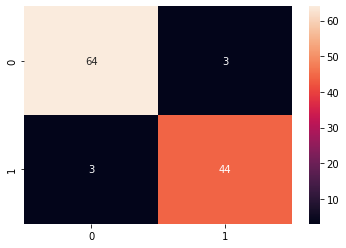

In [14]:
sns.heatmap(cm,annot=True)

## Accuracy of ANN

In [15]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 189.4736842105263%


## Sources

- **Breast Cancer Wisconsin (Diagnostic) Data Set**: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
- **Intro to Keras with breast cancer data[ANN]** : https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann/notebook
- **[ANN] Making Model for Binary Classification** : https://www.kaggle.com/mirichoi0218/ann-making-model-for-binary-classification
- **Why do we use ReLU in neural networks and how do we use it?** : https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it
- **Activation Functions: Sigmoid, Tanh, ReLU, Leaky ReLU, Softmax** : https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5